# Pytorch & Deep Learning

![pytorch image](https://miro.medium.com/max/919/1*Z4L6D1RiQauGmB3TGK_wJg.gif)

Pytorch was released in 2017 as an open source project by Facebook's AI Research team. It is a framework that is extremely popular for building and training neural networks. Pytorch takes the arrays that we commonly use with NumPy (numerical pythong), which can also be used as tensors, and makes them more powerful by simplifying the move to GPUs for faster processing needed for training neural networks. 

Pytorch also provides a much loved module that enables automatic calcs for gradients (for backprop), so no more having to calculate lots of partial derivatives. Yay!

## Pytorch Neural Nets and Tensors

For recap, we calculate the output of a network by:

$ y = f( \sum_{i} w_{i}x_{i} + b ) $

### But what are tensors?

You can think of neural network calcs as a bunch of linear algebra calcs on tensors. Tensors, are generalised formats of matrics:
- 1D Tensor -> vector
- 2D Tensor -> Matrix
- 3D tensor -> Array

Tensors are fundemental **data structures**.

## Lets build a simple Neural Network using Pytorch

In [1]:
import torch 
torch.__version__

'1.7.1'

We will begin by creating a function for our activation function, followed by creating the structures for our features, weights and bias. We will use `torch.randn`, which fills our sized tensor with values from a normal distribution with 0 mean and 1 standard deviation.

In [5]:
torch.manual_seed(7)

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# randn() returns a tensor filled with random numbers from a normal distribution with mean 0 and var 1
features = torch.randn(size=(1,5))
# rand_like returns a tensor with same shape as input - filled with random numbers from normal distr
weights  = torch.rand_like(features)
bias = torch.randn(size=(1,1))

Now, lets do a simple feed forward pass, using the equation for determining $y$ detailed above. The first step is to always calculate the dot product between our features (input layer) and our weights.

In [23]:
y = sigmoid((torch.sum(features*weights) + bias))
print(y)

tensor([[0.6140]])


Lets instead calculate using an in-built function.

In [6]:
torch.mm(features, weights)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x5 and 1x5)

As you'd expect, we are having a shape mismatch. This is because in order to multiply two matrices, we need them to be in theright shapes (no of cols of the first tensor must be the same as the no of rows of tensor 2). There are three solutions to this problem:
- `matr.reshape(a,b)`: returns a new tensor with the same data as matr, but with size (a,b). Sometimes it clones it to a new part in memory however
- `matr.reize_(a,b)`: returns same tensor with new shape. But, if new shape is smaller, it removes elements from tensor and if it is bigger, those new elements will be uninitialised. the underscore shows it will happen in-place
- `matr.view(a,b)`: returns a new tensor with the same data as matr, but with the new size (a,b)

In [24]:
y = sigmoid(torch.mm(features,weights.view(5,1)) + bias)
y

tensor([[0.6140]])

Now, we will enhance our network by adding a hidden layer. Now, with a hidden layer, this will add some very tiny little small complexity, but luckily linear algebtra and pytorch abstract away any mathematical complexity.

Our neural network will have:
- input layer size (1,5) -> features
- hidden layer -> 2 nodes
- output layer -> 1 node 

Hence we will calculate:

$ y = f_{2}( f_{1}( x^{->}W_{1} ) W_{2} ) $

In [26]:
features = torch.randn(size=(1,3))
print('Our feature input: ', features)
# define network
input_nodes = features.shape[1] #3
hidden_nodes = 2
output_nodes = 1
print(f'We have {input_nodes} input nodes, {hidden_nodes} hidden nodes, and {output_nodes} output nodes.')
# define weights
w_0_1 = torch.randn(size=(input_nodes, hidden_nodes))
w_1_2 = torch.randn(size=(hidden_nodes, output_nodes))
# define bias
b_0_1 = torch.randn(size=(1,hidden_nodes))
b_1_2 = torch.randn(size=(1, output_nodes))

Our feature input:  tensor([[ 1.2026, -0.0063, -0.2413]])
We have 3 input nodes, 2 hidden nodes, and 1 output nodes.


A very simple network output can be calculated by:

In [27]:
h1 = sigmoid(torch.mm(features, w_0_1) + b_0_1)
y = sigmoid(torch.mm(h1, w_1_2) + b_1_2)
y

tensor([[0.6247]])

## Man, is this really how you can build large networks?
I know, you're probably thinking this is such a tedious way to build neural networks. If we are doing linear algebra per layer, what happens when we start building neural networks with 100s of layers!

Well, do not worry. Pytorch has a great framework that provides an easy way to build large neural networks. We will now build a network to deal with the famous MNIST dataset.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 

The network we will build will now try to identify digits from an image. This is the hello world problem for image recognition.

Lets begin by downloading our data.

In [3]:
from torchvision import datasets, transforms 

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5))
    ]
)

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100.1%Extracting /Users/abditimer/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /Users/abditimer/.pytorch/MNIST_data/MNIST/raw
113.5%Extracting /Users/abditimer/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/abditimer/.pytorch/MNIST_data/MNIST/raw
100.4%Extracting /Users/abditimer/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/abditimer/.pytorch/MNIST_data/MNIST/raw
180.4%Extracting /Users/abditimer/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/abditimer/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


By using a data loader, we can iterate each of the images using some easy python code - for example:

```python
for image, label in trainloader:
    # do something to each image + label
```

In our instantiation of trainloader above, we set the following parameters:
- batch_size : we set this to 64, as this is the number of images we get in one iteration from the data loader to pass through our network
- shuffle : we set this as True,  as it shuffles the dataset each time we start going through the data loader again 

Lets take a look at an example image from our trainloader dataset (without iterating through the whole set, lets just grab the first example)

In [5]:
data_iterator = iter(trainloader)
images, labels = data_iterator.next()
print('Type: ', type(images))
print('Shape of image: ', images.shape)
print('Shape of label: ', labels.shape)

Type:  <class 'torch.Tensor'>
Shape of image:  torch.Size([64, 1, 28, 28])
Shape of label:  torch.Size([64])


From the above, we can see each data_iterator returns a batch of images, with the above image having a set of 64 images per batch, with 1 colour channel and 28x28 size. Lets look at one image...

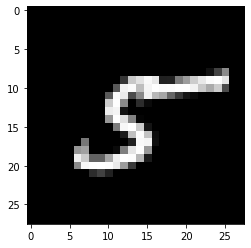

In [6]:
plt.imshow(
    images[1].numpy().squeeze(),
    cmap='Greys_r'
)

### Lets build a simple network - matric multiplying weight matrices vs PyTorch's nn module

We will build a network first by multiplying weight matrices, and then compare it to PyTorch's nn module, to compare and contrast the abstracted nn module against the hardcoded approach.

Now, the first problem we will run into is that our input images have an incorrect shape for an input vector needed for a fully-connected/dense network. Hence, we need to tweak the 28x28 tensor into a 784 1D vector, by flattening. Our dense network will also have 10 output nodes, one for each predicted digit.

Lets begin by looking at the first approach, **multiplying weight matrices**.

#### Option 1: Define network by multiplying weight matrices manually

In [10]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1,1)

# flatten the batch images
features = images.view(images.shape[0], -1)
# build the network
input_units = 784
hidden_units = 256
output_units = 10

w_0_1 = torch.randn(size=(input_units, hidden_units))
b_0_1 = torch.randn(size=(1, hidden_units))
w_1_2 = torch.randn(size=(hidden_units, output_units))
b_1_2 = torch.randn(size=(1, output_units))
# Feed forward pass
hidden_activation = sigmoid(torch.mm(features, w_0_1) + b_0_1)
y = torch.mm(hidden_activation, w_1_2) + b_1_2
print('Output shape: ', y.shape)

probability_outputs = softmax(y)
# lets print out the output shape
print('Check output shape: ', probability_outputs.shape)

Output shape:  torch.Size([64, 10])
Check output shape:  torch.Size([64, 10])


Now, lets look at the second approach, **using nn PyTorch module to build networks**.

#### Option 2: Get a little help from nn module 

In [11]:
from torch import nn 

class OurNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # define structure
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        # define non-linearity
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1) # 1 forces softmax to be calculated across columns

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

model = OurNetwork()
model

OurNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

Lets describe our code above:
- inheriting from the nn.Module & calling the super() allows us to traqck the architecture and inherit a lot of useful methods and attributes
- nn.Linear allows us to do Linear transformations of the type $x\mathbf{W} + b$. And when we pass in parameters nn.Linear(784, 256), we are defining 784 inputs of this layer and 256 outputs. Automatically, the weights and biases are created that are used during forward prop. These can be accessed later once the network has been initialised <initialised_network_name>.hidden.weight or <initialised_network_name>.hidden.bias 
- You can also use nn modules softmax and sigmoid
- using the nn.Module, you must create a forward method
- the forward method takes a tensor, x, and feeds it forwards through the network as we have defined in this method 

#### Option 3: Get a little help from nn.Module and its function module

nn has another option to create more concise and easier to put together models.

In [12]:
import torch.nn.functional as F

class ConciseNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        return x 

model2 = ConciseNetwork()
model2

ConciseNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

#### Option 4: build even quicker models with nn.Sequential

In [29]:
input_size = 784
hidden_size = [128, 64]
output_size = 10
model = nn.Sequential(
    nn.Linear(input_size, hidden_size[0]),
    nn.ReLU(),
    nn.Linear(hidden_size[0], hidden_size[1]),
    nn.ReLU(),
    nn.Linear(hidden_size[1], output_size),
    nn.Softmax(dim=1)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

#### Option 5: nn.Sequential but with a dictionary

In [30]:
from collections import OrderedDict 
model = nn.Sequential(
    OrderedDict([
        ('fc1', nn.Linear(input_size, hidden_size[0])),
        ('relu1', nn.ReLU()),
        ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
        ('relu2', nn.ReLU()),
        ('output', nn.Linear(hidden_size[1], output_size)),
        ('softmax', nn.Softmax(dim=1))
    ])
)
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

## SIDENOTE - Helper functions

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()



### Building a more sophisticated network

Now lets build a deeper neural net, that has two hidden layers. Our network will have:
- 784 input units
- 128 unit hidden layer 1 - activated by ReLU
- 64 unit hidden layer 2 - activated by ReLU
- output layer - softmax activation - 10 units 



In [18]:
import torch.nn.functional as F 

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64,10)
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x), dim=1)
        return x 
    
model = Network()
print('Lets have a look at our network:')
print(model)

print('\nLets take a look at the weights and biases that are automatically initialised:')
print('Weights:\n', model.hidden1.weight)
print('Bias:\n', model.hidden1.bias)

Lets have a look at our network:
Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

Lets take a look at the weights and biases that are automatically initialised:
Weights:
 Parameter containing:
tensor([[-0.0271, -0.0301, -0.0104,  ...,  0.0085, -0.0131,  0.0317],
        [-0.0019, -0.0237, -0.0180,  ..., -0.0069, -0.0147, -0.0266],
        [-0.0338, -0.0300,  0.0182,  ..., -0.0241,  0.0356,  0.0072],
        ...,
        [ 0.0285, -0.0116,  0.0151,  ...,  0.0109,  0.0119,  0.0320],
        [ 0.0320,  0.0139, -0.0310,  ...,  0.0272, -0.0054, -0.0296],
        [-0.0174, -0.0010, -0.0039,  ...,  0.0060,  0.0126,  0.0070]],
       requires_grad=True)
Bias
: Parameter containing:
tensor([-1.5029e-03, -3.3380e-02, -3.3476e-03,  1.9709e-02,  1.8624e-02,
         2.1151e-02, -4.1652e-03,  2.7308e-02,  2.6210e-02,  6.2287e-03,
        -1.156

But, we don't like how the model has initialised these. Instead, we can use the `data` within these variables to assign either 0's using `fill` or a random number using `normal`. Lets edit both the bias and weights of our first hidden layer.

In [19]:
print('The original weights and bias of our first layer: ')
print(model.hidden1.weight)
print(model.hidden1.bias)
print('\nNow lets update these values...')
model.hidden1.weight.data.normal_(std=0.01) # _ means inplace
model.hidden1.bias.data.fill_(0)
print('\nNow that we have replaced them, lets take another look at the values.')
print(model.hidden1.weight)
print(model.hidden1.bias)

The original weights and bias of our first layer: 
Parameter containing:
tensor([[-0.0271, -0.0301, -0.0104,  ...,  0.0085, -0.0131,  0.0317],
        [-0.0019, -0.0237, -0.0180,  ..., -0.0069, -0.0147, -0.0266],
        [-0.0338, -0.0300,  0.0182,  ..., -0.0241,  0.0356,  0.0072],
        ...,
        [ 0.0285, -0.0116,  0.0151,  ...,  0.0109,  0.0119,  0.0320],
        [ 0.0320,  0.0139, -0.0310,  ...,  0.0272, -0.0054, -0.0296],
        [-0.0174, -0.0010, -0.0039,  ...,  0.0060,  0.0126,  0.0070]],
       requires_grad=True)
Parameter containing:
tensor([-1.5029e-03, -3.3380e-02, -3.3476e-03,  1.9709e-02,  1.8624e-02,
         2.1151e-02, -4.1652e-03,  2.7308e-02,  2.6210e-02,  6.2287e-03,
        -1.1567e-02, -3.3268e-02, -1.4553e-02, -9.9528e-03, -4.6209e-03,
        -1.8345e-02,  2.7739e-02, -1.1830e-02,  2.4072e-02, -1.7070e-02,
         8.4473e-03, -2.7206e-02, -1.9991e-03, -9.1205e-03,  5.7833e-03,
         7.6782e-03,  5.8221e-03,  3.2772e-03,  3.2624e-02,  1.2041e-02,
      

Now that we have our network defined and our initial tensors with values, we will pass our data through the network - the forward pass. 

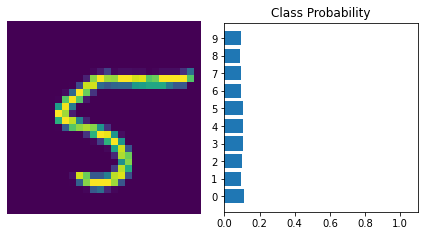

In [27]:
data_iter = iter(trainloader)
images, labels = data_iter.next()
images.resize_(64, 1, 784)
first_image = 0
pred = model.forward(images[first_image, :])
img = images[first_image]
view_classify(img.view(1,28,28), pred)

You can see that the model does not do a good job - its just saying that it belongs to each class. But the picture clearly is not every single number between 0 - 9! Here, we must blame our initialisation of the weights. We need to go back and train the model, and update the weights. To do this, we need to **train** the network.

## Training our network

Earlier, you saw how we could put together a network structure using PyTorch's `nn` module. Now, we want to build a way to improve our network.



In [31]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
# defining criterion aka loss function aka cost
criterion = nn.CrossEntropyLoss()

# lets calculate the loss for a single image
images, labels = iter(trainloader).next()
images = images.view(images.shape[0], -1)
# forward pass
pred = model(images)
loss = criterion(pred, labels)
print(loss)

tensor(2.3371, grad_fn=<NllLossBackward>)


We will now build a model that instead returns a log-softmax output, which we then convert to a probability using an exponential to get the actual probability output. 

In [33]:
# build a model - same as before but output needs to be a log-softmax
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)
# define loglikelihoodloss
criterion = nn.NLLLoss()

# lets pass a batch of images through
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
pred = model(images)
loss = criterion(pred, labels)
print('Loss:\t', loss)

Loss:	 tensor(2.2777, grad_fn=<NllLossBackward>)


### Okay, but how do we do backpropagation?

Pyotrch keep track of parameters by using a feature called Autograd. This module automatically finds out the gradients of tensors, our weights, with respect to our loss. This module keeps track of what is performed by the tensor, then going backwards, and calculating the gradients. 

Lets now build a network that uses gradient descent.

In [34]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

pred = model(images)
loss = criterion(pred, labels)

print('Before backwards pass our weights were:\n', model[0].weight.grad)
# calculate backwards propagation and update the weights
loss.backward()
print('After backward prop:\n', model[0].weight.grad)

Before backwards pass our weights were:
 None
After backward prop:
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0056, -0.0056, -0.0056,  ..., -0.0056, -0.0056, -0.0056]])


### Okay, but what about the gradient descent step optimiser?
You can use PyTorch's optim package - for updating the weights with the gradients. Here is an example of how to define an optimiser:

In [35]:
from torch import optim 
optimiser = optim.SGD(model.parameters(), lr=0.01)

This will actually allow us to now change our weights, and do the weight update step.

In [39]:
print('Before backwards pass our weights were:\n', model[0].weight)

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# set the previous update weights to 0
optimiser.zero_grad()

pred = model.forward(images)
loss = criterion(pred, labels)

# calculate backprop
loss.backward()
print('After backward prop:\n', model[0].weight.grad)

# now lets do the weight update step
optimiser.step()
print('After weights are adjusted:\n', model[0].weight)

Before backwards pass our weights were:
 Parameter containing:
tensor([[ 0.0245,  0.0149,  0.0319,  ...,  0.0284,  0.0175,  0.0009],
        [-0.0209,  0.0199,  0.0051,  ...,  0.0237,  0.0138,  0.0074],
        [ 0.0083,  0.0102,  0.0253,  ..., -0.0355,  0.0300,  0.0351],
        ...,
        [ 0.0110,  0.0029, -0.0149,  ...,  0.0304, -0.0055, -0.0347],
        [ 0.0299,  0.0137,  0.0238,  ..., -0.0351, -0.0333, -0.0342],
        [-0.0356, -0.0320, -0.0184,  ..., -0.0302,  0.0114,  0.0034]],
       requires_grad=True)
After backward prop:
 tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-7.3480e-04, -7.3480e-04, -7.3480e-04,  ..., -7.3480e-04,
         -7.3480e-04, -7.3480e-04],
        [-1.7056e-03, -1.7056e-03, -1.7056e-03,  ..., -1.7056e-03,
         -1.7056e-03, -1.7056e-03],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.9519e-06,  1.9519

## Lets put it all together.



In [43]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()
optimiser = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimiser.zero_grad()

        pred = model.forward(images)
        loss = criterion(pred, labels)
        loss.backward()
        optimiser.step()
        running_loss += loss.item()
    else:
        print(f'Training loss: {running_loss / len(trainloader)}')

Training loss: 1.9754525994949503
Training loss: 0.9031397450580272
Training loss: 0.521615672800968
Training loss: 0.4248012309866165
Training loss: 0.3810942452599499


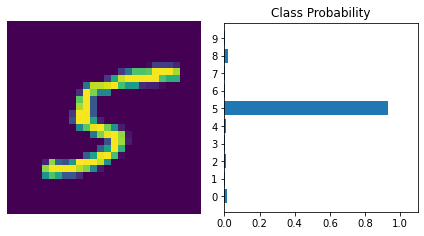

In [46]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)